# **2. Color Channel**
* Color Channel 알아보기

In [7]:
from configs.config import BASE_PATH
from matplotlib import pyplot as plt
import numpy as np
import cv2
import os

path = os.path.join(BASE_PATH,"data","image",'opencv_image2.jpg')

## **1. Gray Scale**

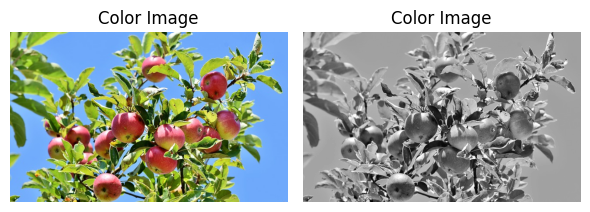

In [8]:
img_gray = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
img = cv2.imread(path,cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

fig,ax = plt.subplots(1,2, figsize=(6,4))

ax[0].imshow(img)
ax[0].set_title('Color Image')
ax[0].axis('off')

ax[1].imshow(img_gray, cmap='gray')
ax[1].set_title('Color Image')
ax[1].axis('off')

plt.tight_layout()
plt.show()

## **2.RGB**

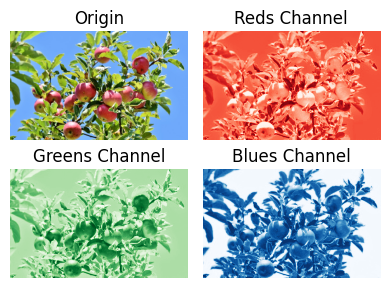

In [9]:
fig,ax = plt.subplots(2,2, figsize=(4,3))

ax[0,0].imshow(img)
ax[0,0].axis('off')
ax[0,0].set_title('Origin')

colors = ['Reds', 'Greens', 'Blues']
for i,color in enumerate(colors,start=1):
    r,c = i//2,i%2
    ax[r,c].imshow(img[:,:,i-1], cmap=f'{color}_r')
    ax[r,c].axis('off')
    ax[r,c].set_title(f'{color} Channel')

plt.tight_layout()
plt.show()

* 컬러 매핑이 반대로 되어있어서 cmap 지정할 때, _r을 붙여서 색상 반전을 시켜준다.
  
* 이러면 하늘색 배경에서 Blue Channel을 보면 배경의 흰색으로 밝기가 높게 나오는 것을 확인할 수 있다.

## **3. HSV**

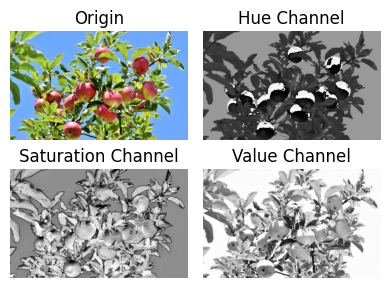

In [10]:
img_hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
fig, ax = plt.subplots(2,2, figsize=(4,3))

ax[0,0].imshow(img)
ax[0,0].axis('off')
ax[0,0].set_title('Origin')

colors = ['Hue', 'Saturation', 'Value']
for i,color in enumerate(colors,start=1):
    r,c = i//2,i%2
    ax[r,c].imshow(img_hsv[:,:,i-1], cmap='gray')
    ax[r,c].axis('off')
    ax[r,c].set_title(f'{color} Channel')

plt.tight_layout()
plt.show()

* Hue같은 경우는 색조라서 값을 조정하면서 튜닝하기는 어렵다.

* 아래 코드에서 Saturation, Value를 통해서 이미지를 처리한다.

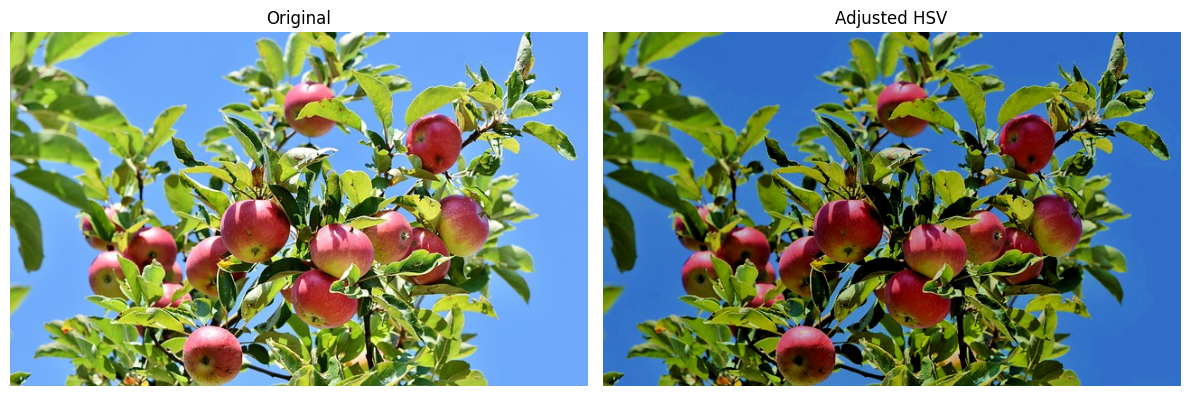

In [11]:
img_hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

hue, saturation, value = cv2.split(img_hsv)
saturation_added = cv2.add(saturation, 50)
value_added = cv2.add(value, -50)
img_add = cv2.merge([hue, saturation_added, value_added])
img_add = cv2.cvtColor(img_add, cv2.COLOR_HSV2RGB)

fig,ax = plt.subplots(1,2,figsize=(12,6))

ax[0].imshow(img)
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].imshow(img_add)
ax[1].set_title('Adjusted HSV')
ax[1].axis('off')

plt.tight_layout()
plt.show()

* 채도를 높여서 조금 더 원색처럼 진해진 모습을 볼 수 있다.

* 밝기는 전체적으로 낮아진 모습을 볼 수 있다.

* 명암의 구분이 확실해졌다.

## **4. YCbCr**

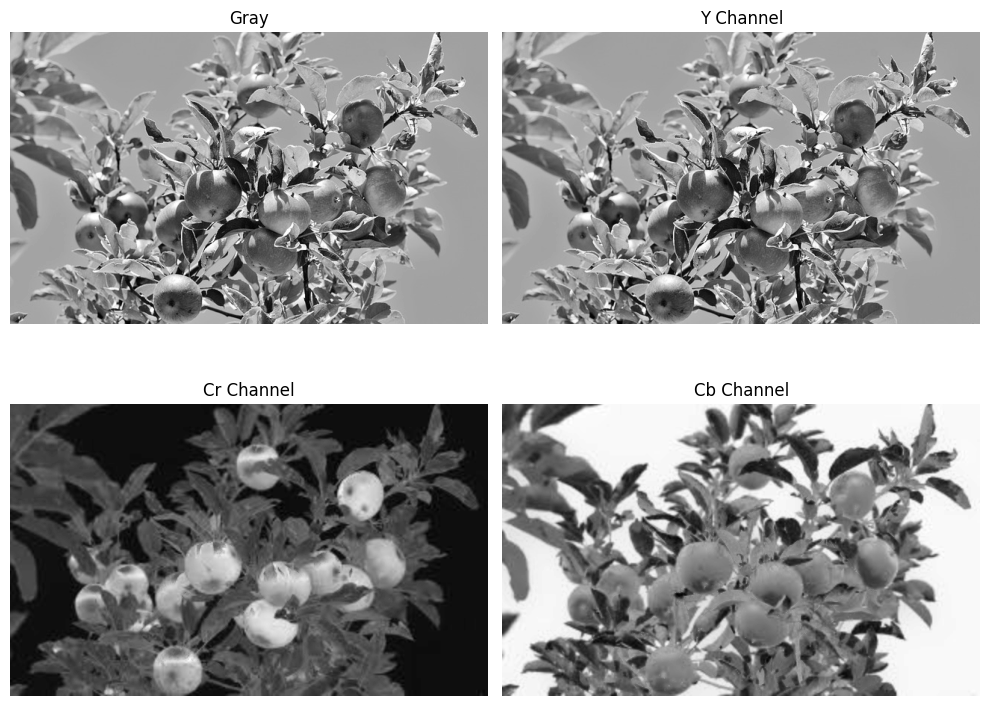

In [12]:
img_ycbcr = cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)

y,cr,cb = cv2.split(img_ycbcr)

fig,ax = plt.subplots(2,2,figsize=(10, 8))

ax[0,0].imshow(img_gray, cmap='gray')
ax[0,0].axis('off')
ax[0,0].set_title('Gray')

channels = [('Y Channel', y), ('Cr Channel', cr), ('Cb Channel', cb)]

for i, (title, channel) in enumerate(channels, start=1):
    r,c = i//2,i%2
    ax[r,c].imshow(channel, cmap='gray')
    ax[r,c].axis('off')
    ax[r,c].set_title(title)

plt.tight_layout()
plt.show()

* 밝기 Y는 Origin이랑 같은 모습을 확인할 수 있다.

* Cr의 경우에는 사과의 빨간 부분이 밝은 모습을 확인할 수 있다.

* Cb의 경우에는 배경의 부분의 밝은 모습을 확인할 수 있다.